In [1]:
from memory_profiler import memory_usage, profile
import matplotlib.pyplot
import time
import psutil
import os
import constants
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Parametros

A = 'HD'
B = 'Gluster'
C = 'SSD'

cod = 'LifeExp'
run = '30r'
loop = '2l'

title = 'Desempenho do código ' + cod + ' | ' + run + ' x ' + loop

figName = cod + '_' + run + '_' + loop + '.png'


In [3]:
# Funções de conversão
def mstos(x):
    val = x/1000
    return val
      
def ustos(x):
    val = x/1000000
    return val
       
def nstos(x):
    val = x/1000000000
    return val

def convert(x,y):
    if y == 'ms':
        return mstos(x)
    elif y == 'µs':
        return ustos(x)
    elif y == 'ns':
        return nstos(x)
    else:
        return x
        


In [4]:
%%capture

def lifeHD():
    %run ./lifeExpectancyHD.ipynb

    
a = %timeit -n 2 -r 30 -o lifeHD()
#a = %timeit -o lifeHD()

In [5]:
%%capture

def lifeGluster():
    %run ./lifeExpectancyGluster.ipynb

b = %timeit -n 2 -r 30 -o lifeGluster()
#b = %timeit -o lifeGluster()

In [6]:
%%capture

def lifeSSD():
    %run ./lifeExpectancySSD.ipynb

c = %timeit -n 2 -r 30 -o lifeSSD()
#c = %timeit -o lifeSSD()

In [7]:
print("")

print("- Tempo de execução Expectativa de vida com HD: ")
print(a)

print("")

print("- Tempo de execução Expectativa de vida com Gluster: ")
print(b)

print("")

print("- Tempo de execução Expectativa de vida com SSD: ")
print(c)



- Tempo de execução Expectativa de vida com HD: 
5.5 s ± 1.17 s per loop (mean ± std. dev. of 30 runs, 2 loops each)

- Tempo de execução Expectativa de vida com Gluster: 
5.13 s ± 201 ms per loop (mean ± std. dev. of 30 runs, 2 loops each)

- Tempo de execução Expectativa de vida com SSD: 
5.08 s ± 155 ms per loop (mean ± std. dev. of 30 runs, 2 loops each)


In [8]:
def mstos(x):
    val = x/1000
    return val
      
def ustos(x):
    val = x/1000000
    return val
       
def nstos(x):
    val = x/1000000000
    return val

    

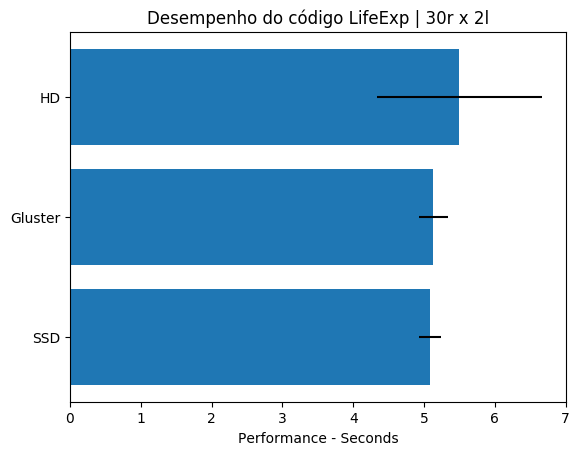

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Convertendo Objeto para String

a = str(a)
b = str(b)
c = str(c)

# Separando a média de tempo de cada componente testado e Convertendo tudo para Segundos caso não esteja

aTime = convert(float(a.split(' ')[0]), a.split(' ')[1])
bTime = convert(float(b.split(' ')[0]), b.split(' ')[1])
cTime = convert(float(c.split(' ')[0]), c.split(' ')[1])

# Separando o desvio padrão de cada componente testado e Convertendo tudo para Segundos caso não esteja

aDev = convert(float(a.split(' ')[3]), a.split(' ')[4])
bDev = convert(float(b.split(' ')[3]), b.split(' ')[4])
cDev = convert(float(c.split(' ')[3]), c.split(' ')[4])

# Atribuindo todos os dados ao gráfico

people = (A, B, C)
results = (aTime, bTime, cTime)
dev = (aDev, bDev, cDev)

y_pos = np.arange(len(people))
performance = results

error = dev

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels são lidos de cima para baixo
ax.set_xlabel('Performance - Seconds')
ax.set_title(title)

plt.savefig(figName)
plt.show()